# LOADING IPL DATASET

In [1]:
import pandas as pd
import numpy as np
ipl_auction_df=pd.read_csv('IPL2013.csv')
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [2]:
X_features=['AGE','COUNTRY','PLAYING ROLE','T-RUNS','T-WKTS','ODI-RUNS-S','ODI-SR-B','ODI-WKTS','ODI-SR-BL','CAPTAINCY EXP','RUNS-S','HS','AVE','SR-B','SIXERS','RUNS-C','WKTS','AVE-BL','ECON','SR-BL']

In [3]:
#Initialize a list with the categorical feature names

categorical_features=['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

#get_dummies()  is invoked to return the dummy features

ipl_auction_encoded_df=pd.get_dummies(ipl_auction_df[X_features],columns=categorical_features,drop_first=True)

In [4]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [5]:
X=ipl_auction_encoded_df
Y=ipl_auction_df['SOLD PRICE']

# Standardization of X and Y 

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
#Initaializing the standardscaler
X_scaler=StandardScaler()

#Standardize all the feature columns
X_scaled=X_scaler.fit_transform(X)

#Standardizing Y explicitly by subtracting mean and dividing by standard deviation 
Y=(Y-Y.mean())/Y.std()

# Split the Dataset into Train and Test

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

# Build the Model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [11]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

In [12]:
columns_coef_df=pd.DataFrame({'columns':ipl_auction_encoded_df.columns,'coef':linreg.coef_})

In [13]:
sorted_coef_vals=columns_coef_df.sort_values('coef',ascending=False)

# Plotting the coefficient values

Text(0, 0.5, 'features')

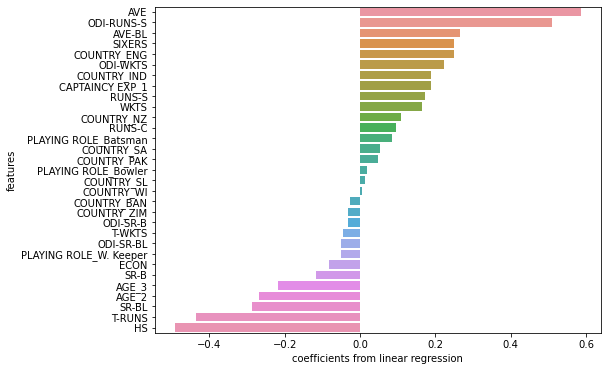

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(8,6))
sn.barplot(x='coef',y='columns',data=sorted_coef_vals)
plt.xlabel("coefficients from linear regression")
plt.ylabel('features')

# Calculate RMSE

In [15]:
from sklearn import metrics

#Prints the rmse on train and test set

def get_train_test_rmse(model):
    y_train_pred=model.predict(X_train)
    rmse_train=round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),3)
    
    y_test_pred=model.predict(X_test)
    rmse_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),3)
    print("train:",rmse_train,"test",rmse_test)

In [16]:
get_train_test_rmse(linreg)

train: 0.679 test 0.749


# Applying Regularization

In [17]:
#Ridge Regression

from sklearn.linear_model import Ridge

#Applying alpha=1 and running algorithm for maximum of 500 iterations

ridge=Ridge(alpha=1,max_iter=500)
ridge.fit(X_train,y_train)

Ridge(alpha=1, max_iter=500)

In [18]:
get_train_test_rmse(ridge)

train: 0.68 test 0.724


In [20]:
# Difference of rmse reduced because of penalty effect. MNow apply alpha=2.0

ridge=Ridge(alpha=2.0,max_iter=1000)
ridge.fit(X_train,y_train)
get_train_test_rmse(ridge)

train: 0.682 test 0.706


# LASSO REGRESSION

In [21]:
#Importing lasso regression

from sklearn.linear_model import Lasso

#Applying alpha=1 and running algorithm for maximum of 500 iterations

lasso=Lasso(alpha=0.01,max_iter=500)
lasso.fit(X_train,y_train)
get_train_test_rmse(lasso)



train: 0.688 test 0.698


In [22]:
#storing the feature names and coefficient values in the DataFrame
lasso_coef_df=pd.DataFrame({'columns':ipl_auction_encoded_df.columns,'coef':lasso.coef_})

In [23]:
#filtering out coeffcients with zeros
lasso_coef_df[lasso_coef_df.coef==0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


# Elastic Net Regression

In [26]:
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=1.01,l1_ratio=0.001,max_iter=500)
enet.fit(X_train,y_train)
get_train_test_rmse(enet)

train: 0.789 test 0.665


In [27]:
#applying both the regularization did not improve the model performance. Hence we can choose to apply only L1(Laaso)regularization